# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [5]:
for col in app_train:
    if app_train[col].nunique() > 2 and app_train[col].dtype != 'object':
        if abs(app_train[col].corr(app_train['TARGET'])) > 0.05:
            print('I am interesting in {}.'.format(col) + '----Its corr is {:.3f}.'.format(app_train[col].corr(app_train['TARGET'])))

I am interesting in DAYS_BIRTH.----Its corr is -0.078.
I am interesting in DAYS_EMPLOYED.----Its corr is 0.075.
I am interesting in DAYS_ID_PUBLISH.----Its corr is 0.051.
I am interesting in REGION_RATING_CLIENT.----Its corr is 0.059.
I am interesting in REGION_RATING_CLIENT_W_CITY.----Its corr is 0.061.
I am interesting in EXT_SOURCE_1.----Its corr is -0.155.
I am interesting in EXT_SOURCE_2.----Its corr is -0.160.
I am interesting in EXT_SOURCE_3.----Its corr is -0.179.
I am interesting in DAYS_LAST_PHONE_CHANGE.----Its corr is 0.055.


In [6]:
app_train["DAYS_LAST_PHONE_CHANGE"] = abs(app_train["DAYS_LAST_PHONE_CHANGE"])

In [7]:
app_train["DAYS_LAST_PHONE_CHANGE"].head(20)

0     1134.0
1      828.0
2      815.0
3      617.0
4     1106.0
5     2536.0
6     1562.0
7     1070.0
8        0.0
9     1673.0
10     844.0
11    2396.0
12    2370.0
13       4.0
14     188.0
15     925.0
16       3.0
17    2811.0
18     239.0
19    1850.0
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64

In [8]:
app_train_interest = app_train[["TARGET", "DAYS_LAST_PHONE_CHANGE"]]
app_train_interest

,TARGET,DAYS_LAST_PHONE_CHANGE
0,1,1134.0
1,0,828.0
2,0,815.0
3,0,617.0
4,0,1106.0
...,...,...
307506,0,273.0
307507,0,0.0
307508,0,1909.0
307509,1,322.0


In [9]:
app_train_interest['DAYS_LAST_PHONE_CHANGE_bin'] = pd.qcut(app_train_interest['DAYS_LAST_PHONE_CHANGE'], 11, duplicates='drop')

<ipython-input-9-721242f547a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app_train_interest['DAYS_LAST_PHONE_CHANGE_bin'] = pd.qcut(app_train_interest['DAYS_LAST_PHONE_CHANGE'], 11, duplicates='drop')


In [10]:
app_train_interest

,TARGET,DAYS_LAST_PHONE_CHANGE,DAYS_LAST_PHONE_CHANGE_bin
0,1,1134.0,"(877.0, 1178.0]"
1,0,828.0,"(657.0, 877.0]"
2,0,815.0,"(657.0, 877.0]"
3,0,617.0,"(479.0, 657.0]"
4,0,1106.0,"(877.0, 1178.0]"
...,...,...,...
307506,0,273.0,"(102.0, 315.0]"
307507,0,0.0,"(-0.001, 102.0]"
307508,0,1909.0,"(1775.0, 2222.0]"
307509,1,322.0,"(315.0, 479.0]"


In [11]:
app_train_interest_groupby = app_train_interest.groupby("DAYS_LAST_PHONE_CHANGE_bin").mean()
app_train_interest_groupby

,TARGET,DAYS_LAST_PHONE_CHANGE
DAYS_LAST_PHONE_CHANGE_bin,,
"(-0.001, 102.0]",0.093915,7.296868
"(102.0, 315.0]",0.099878,221.968199
"(315.0, 479.0]",0.093910,397.559740
"(479.0, 657.0]",0.092774,566.022578
"(657.0, 877.0]",0.087454,761.661669
"(877.0, 1178.0]",0.078912,1027.257752
"(1178.0, 1511.0]",0.068703,1353.362362
"(1511.0, 1775.0]",0.064498,1638.548481
"(1775.0, 2222.0]",0.060767,1965.202201


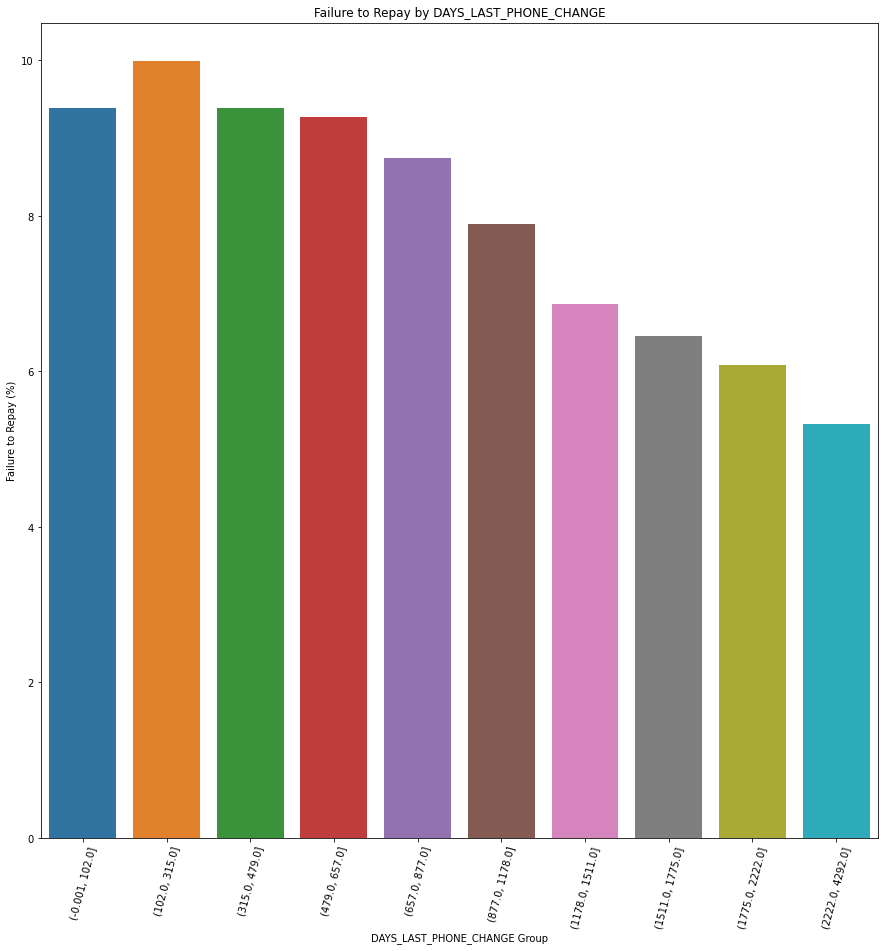

In [12]:
import seaborn as sns
plt.figure(figsize = (15, 15))

px = app_train_interest_groupby.index
py = 100 * app_train_interest_groupby['TARGET']

sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('DAYS_LAST_PHONE_CHANGE Group'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by DAYS_LAST_PHONE_CHANGE');